In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from utils import *
import numpy as np
import pandas as pd
from markov_models.experiments import exp1

from utils import (
    NO_CLIENTS,
    CORR,
    UNCORR,
    CORR_FT,
    UNCORR_FT,
)

from mpl_toolkits.axes_grid1 import make_axes_locatable
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [2]:
# Number of FL training rounds:
n_rounds = 100

# Common carbon budget
global_carbon_budget = 7 # kgCO2e

# Uniform carbon budget
carbon_budget = 1 # kgCO2eq

# list of countries/clients:
countries = [i+1 for i in range(7)]

main_folder = 'availability_matrices/av-mat-3'

formatted_array = [i for i in range(n_rounds)]

In [3]:
def pipeline(exp_type, key_word, folder):
    res_exp = res[exp_type]

    availability_matrix = pd.DataFrame(res_exp, index = countries, columns = formatted_array)

    plot_availability_heatmap("", availability_matrix, key_word, folder=folder)
    availability_matrix.to_csv(folder+'/av-mat_'+key_word+'.csv', columns=formatted_array)

    print("Clients' participation frequencies: ", res_exp.mean(axis=1))

    lam2_list, corr = av_mat_corr(availability_matrix)
    print('Countries lambda_2: ',list(np.round(lam2_list, 2)))
    print('Mean lambda_2: ',np.round(corr, 2))

    t_corr_list, t_corr_mean, sp_corr_dict, sp_corr_mean = av_mat_p_corr(availability_matrix)
    print('Pearson Correlation:')
    print('Time list: ',list(np.round(t_corr_list, 2)))
    print('Time mean: ',np.round(t_corr_mean, 2))
    print('Spatial dict: ',{key: float(f"{value:.{2}f}") for key, value in sp_corr_dict.items()})
    print('Spatial mean: ',np.round(sp_corr_mean, 2))

    # p_corr_list, p_corr = av_mat_p_corr(availability_matrix)
    # print('Countries p_corr: ',list(np.round(p_corr_list, 2)))
    # print('Mean p_corr: ',np.round(p_corr, 2))

    # sp_corr_dict, sp_corr = av_mat_spatial_corr(availability_matrix)
    # print('Countries p_corr: ',{key: float(f"{value:.{2}f}") for key, value in sp_corr_dict.items()})
    # print('Mean p_corr: ',np.round(sp_corr, 2))

In [4]:
ft_duration=5
t=35
T=100
target_freq=t/T
res = exp1(t=t, k=ft_duration, T=T,_eps=0.25)
sub_folder=str(int(target_freq*100))+'perc'

# Correlated case

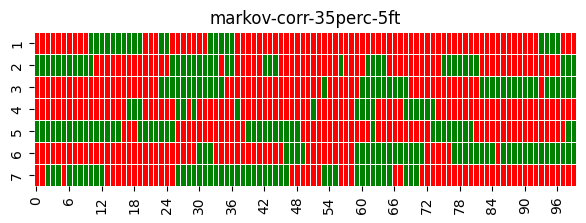

Clients' participation frequencies:  [0.21 0.4  0.39 0.18 0.44 0.42 0.44]
Countries lambda_2:  [0.76, 0.7, 0.81, 0.52, 0.79, 0.82, 0.75]
Mean lambda_2:  0.74
Pearson Correlation:
Time list:  [0.76, 0.7, 0.81, 0.52, 0.79, 0.81, 0.75]
Time mean:  0.74
Spatial dict:  {'1-2': -0.17, '1-3': -0.01, '1-4': -0.05, '1-5': -0.01, '1-6': -0.19, '1-7': -0.06, '2-3': 0.02, '2-4': -0.12, '2-5': 0.26, '2-6': -0.07, '2-7': 0.3, '3-4': -0.0, '3-5': -0.46, '3-6': 0.48, '3-7': -0.01, '4-5': -0.26, '4-6': 0.02, '4-7': 0.16, '5-6': -0.35, '5-7': -0.01, '6-7': -0.18}
Spatial mean:  -0.03


In [5]:
pipeline(exp_type=CORR, key_word='markov-corr-'+str(int(target_freq*100))+'perc-'+str(int(ft_duration))+'ft', folder=main_folder+'/'+sub_folder)

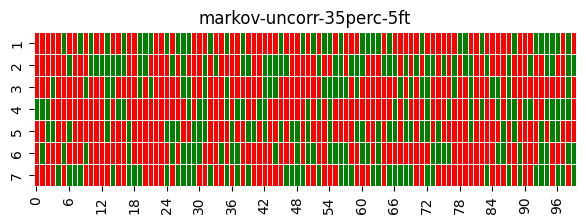

Clients' participation frequencies:  [0.37 0.45 0.29 0.33 0.36 0.34 0.43]
Countries lambda_2:  [-0.04, 0.04, 0.07, 0.06, -0.05, 0.17, 0.11]
Mean lambda_2:  0.05
Pearson Correlation:
Time list:  [-0.04, 0.04, 0.07, 0.06, -0.05, 0.17, 0.11]
Time mean:  0.05
Spatial dict:  {'1-2': -0.07, '1-3': 0.01, '1-4': -0.01, '1-5': -0.01, '1-6': -0.03, '1-7': 0.05, '2-3': 0.13, '2-4': 0.05, '2-5': -0.05, '2-6': -0.18, '2-7': -0.05, '3-4': 0.07, '3-5': -0.02, '3-6': 0.01, '3-7': -0.07, '4-5': 0.09, '4-6': -0.05, '4-7': -0.14, '5-6': 0.03, '5-7': 0.02, '6-7': -0.03}
Spatial mean:  -0.01


In [6]:
pipeline(exp_type=UNCORR, key_word='markov-uncorr-'+str(int(target_freq*100))+'perc-'+str(int(ft_duration))+'ft', folder=main_folder+'/'+sub_folder)

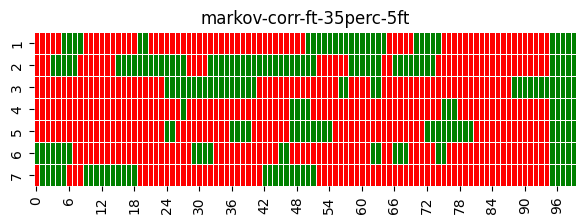

Clients' participation frequencies:  [0.31 0.57 0.33 0.13 0.28 0.25 0.3 ]
Countries lambda_2:  [0.79, 0.77, 0.85, 0.7, 0.78, 0.67, 0.84]
Mean lambda_2:  0.77
Pearson Correlation:
Time list:  [0.79, 0.77, 0.84, 0.68, 0.77, 0.67, 0.83]
Time mean:  0.77
Spatial dict:  {'1-2': 0.19, '1-3': -0.06, '1-4': 0.13, '1-5': 0.21, '1-6': 0.11, '1-7': -0.06, '2-3': 0.05, '2-4': 0.16, '2-5': 0.09, '2-6': 0.13, '2-7': 0.22, '3-4': 0.11, '3-5': 0.08, '3-6': 0.14, '3-7': -0.23, '4-5': 0.55, '4-6': 0.19, '4-7': 0.33, '5-6': -0.0, '5-7': 0.08, '6-7': 0.23}
Spatial mean:  0.13


In [7]:
pipeline(exp_type=CORR_FT, key_word='markov-corr-ft-'+str(int(target_freq*100))+'perc-'+str(int(ft_duration))+'ft', folder=main_folder+'/'+sub_folder)

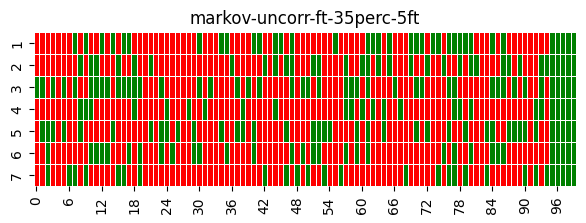

Clients' participation frequencies:  [0.36 0.34 0.44 0.25 0.39 0.31 0.27]
Countries lambda_2:  [0.19, 0.03, 0.01, 0.16, 0.0, 0.08, 0.05]
Mean lambda_2:  0.07
Pearson Correlation:
Time list:  [0.19, 0.03, 0.01, 0.16, 0.0, 0.08, 0.05]
Time mean:  0.07
Spatial dict:  {'1-2': 0.08, '1-3': 0.13, '1-4': 0.1, '1-5': -0.04, '1-6': 0.22, '1-7': 0.11, '2-3': 0.0, '2-4': 0.27, '2-5': 0.03, '2-6': 0.2, '2-7': -0.01, '3-4': -0.0, '3-5': 0.03, '3-6': 0.41, '3-7': 0.05, '4-5': 0.01, '4-6': 0.06, '4-7': 0.07, '5-6': 0.08, '5-7': 0.11, '6-7': -0.02}
Spatial mean:  0.09


In [8]:
pipeline(exp_type=UNCORR_FT, key_word='markov-uncorr-ft-'+str(int(target_freq*100))+'perc-'+str(int(ft_duration))+'ft', folder=main_folder+'/'+sub_folder)

## Tests to verify the participation frequency in the correlated case

(array([  5.,  38.,  98., 189., 192., 122.,  44.,  11.,   1.]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 9 artists>)

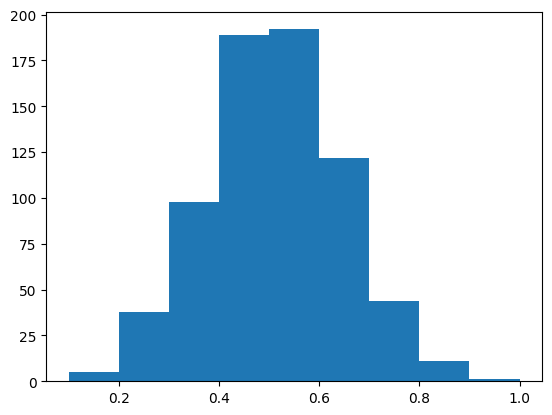

In [9]:
fin_res = [
    exp1(t=50, T=100, k=10, _eps=0.25)['corr']
    for _ in range(100)
]
tmp = np.sum(np.vstack(fin_res), axis=-1)/100

plt.hist(tmp, bins=[(i+1)/10 for i in range(10)])
# plt.savefig("Corr_0_01__1.png")

In [10]:
# plt.figure(figsize=(12, 12))  # Set the figure size here
# plt.imshow(tmp, cmap='binary')  # Display the image
# plt.savefig("tmp.png")